**Dima Tsvetkov**

**NetID: dt169**

**Homework #3**

Agreement 1) This assignment represents my own work. I did not work on this assignment with
others. All coding was done by myself.

Agreement 2) I understand that if I struggle with this assignment that I will reevaluate whether
this is the correct class for me to take. I understand that the homework only gets harder.

Problem1:Linearregressiononasimpledataset(30 pts)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
XY_raw = pd.read_csv('Concrete_Data_Yeh.csv')
XY_raw

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [20]:
XY_raw.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:>

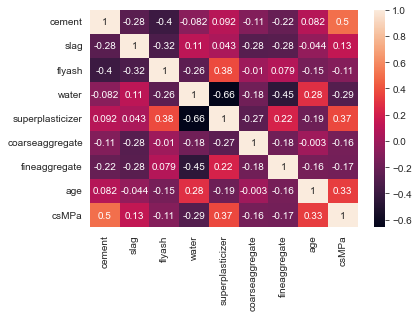

In [16]:
sns.heatmap(XY_raw.corr(), annot=True)

Processing the data.

In [98]:
X = XY_raw.iloc[:, :-1]
y = XY_raw.iloc[:, -1]

In [99]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y), '\n', reg.coef_, reg.intercept_)

0.6155198704142721 
 [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
  0.02019035  0.11422207] -23.331213584903594


In [101]:
print(reg.predict(X))

[53.46346329 53.73475651 56.81258504 ... 26.46841169 29.12237014
 31.89770807]


First, let's find the derivatives of MSE loss function with respect to weights (including the bias $\beta_0$).
$$MSE=\frac{1}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)^2.$$
Thus, the derivative with respect to weight $\beta$:
$$\frac{\partial MSE}{\partial \beta}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0) X_i$$
and with respect to bias $\beta_0$:
$$\frac{\partial MSE}{\partial \beta_0}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)$$

In [220]:
# because it's being used everywhere
def y_predicted(X, coef, bias):
    return np.dot(X, coef.T) + bias

# MSE loss
def MSE(X, y, coef, bias):
    y_pred = y_predicted(X, coef, bias)
    dif = y - y_pred
    # loss = np.mean(dif ** 2)
    loss = np.dot(dif.T, dif) / len(y)
    return loss

# d MSE/d beta
def gradient_beta(X, y, coef, bias):
    dif = y - y_predicted(X, coef, bias)
    # partial = -2 * X.multiply(dif, axis=0)
    # grad = np.mean(partial, axis=0)
    grad = -2 * np.dot(dif.T, X) / len(y)
    return grad

# d MSE/d beta_0
def gradient_beta0(X, y, coef, bias):
    dif = y - y_predicted(X, coef, bias)
    grad = -2 * np.sum(dif) / len(y)
    return grad



coef = np.zeros(np.shape(X)[1])
bias = 0
learning_rate = 0.0000001
learning_rate_bias = 0.01
# coef = [ 0.11980433,  0.10386581,  0.08793432, -0.14991842,  0.2922246,   0.01808621, 0.02019035,  0.11422207]
# bias = -23.331213584903594
# bias = -0
# print(MSE(X, y, coef, bias))
# print(y_predicted(X, coef, bias))
for i in range(100000):
    # print(gradient_beta(X, y, coef, bias))
    # print(gradient_beta(X, y, coef, bias))
    coef -= learning_rate * gradient_beta(X, y, coef, bias)
    bias -= learning_rate_bias * gradient_beta0(X, y, coef, bias)
print(coef, bias)
# print(np.dot(X, X.T)**-1)
# print(np.dot(np.dot((np.dot(X, X.T)**-1), X).T, y))
# print((np.linalg.inv(np.dot(X.T, X))))
# print(np.dot(np.dot((np.linalg.inv(np.dot(X.T, X))), X.T), y))
# print(np.dot((np.dot(X, X.T)**-1), X))
# print(np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)) * X.T), Y))
 # [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
 #  0.02019035  0.11422207] -23.331213584903594
 # [ 0.12615105  0.11030733  0.10206241 -0.15808842  0.04520626  0.0148587
 #  0.02434598  0.11255708] -23.331213584903594

[ 0.0985917   0.06659756  0.05165472 -0.05985131  0.01672521 -0.00703036
  0.00581468  0.07961173] 9.852997686606239


In [221]:
print(MSE(X, y, coef, bias))
y_predicted(X, coef, bias)

129.5115627295077


array([52.28669782, 52.1812424 , 56.87558541, ..., 28.44663288,
       27.51089528, 35.03012022])

In [218]:
X_new = X.copy()
X_new['bias'] = np.ones(len(y))
print(np.dot(np.dot((np.linalg.inv(np.dot(X_new.T, X_new))), X_new.T), y))
coef2 = np.array([ 0.11980433,  0.10386581,  0.08793432, -0.14991842,  0.2922246,   0.01808621, 0.02019035,  0.11422207])
bias2 = -23.331213584903594
print(MSE(X, y, coef2, bias2))

[ 1.19804334e-01  1.03865809e-01  8.79343215e-02 -1.49918419e-01
  2.92224595e-01  1.80862148e-02  2.01903511e-02  1.14222068e-01
 -2.33312136e+01]
107.19723607490728


In [214]:
reg.predict(X)

array([53.46346329, 53.73475651, 56.81258504, ..., 26.46841169,
       29.12237014, 31.89770807])

First, let's find the derivatives of MSE loss function with respect to weights (including the bias $\beta_0$).
$$MSE=\frac{1}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)^2.$$
Thus, the derivative with respect to weight $\beta$:
$$\frac{\partial MSE}{\partial \beta}=(-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0))^T X$$
and with respect to bias $\beta_0$:
$$\frac{\partial MSE}{\partial \beta_0}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)$$